In [34]:
import matplotlib.pyplot as plt
import torch
from torch import nn

<Figure size 600x300 with 0 Axes>

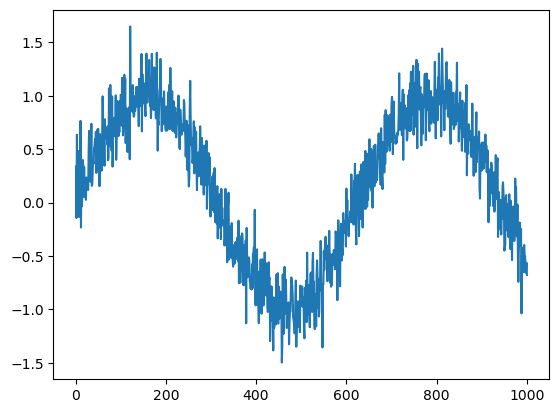

<Figure size 600x300 with 0 Axes>

In [35]:
%matplotlib inline
T = 1000  # 总共产生1000个点
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0, 0.2, (T,))
plt.plot(time, x)
plt.figure(figsize=(6, 3))

In [36]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))

batch_size, n_train = 8, 600
# 只有前n_train个样本用于训练
train_iter = zip(features[:n_train].reshape(-1, 8, 4), labels[:n_train].reshape(-1, 8, 1))
# train_iter = d2l.load_array((features[:n_train], labels[:n_train]),
#                             batch_size, is_train=True)

In [37]:
# 初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)


# 一个简单的多层感知机
def get_net():
    net_ = nn.Sequential(
        nn.Linear(4, 10),
        nn.ReLU(),
        nn.Linear(10, 1)
    )
    net_.apply(init_weights)
    return net_


# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction='none')

In [38]:
def train(net_, train_iter_, loss_, epochs, lr):
    trainer = torch.optim.Adam(net_.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter_:
            trainer.zero_grad()
            l = loss_(net_(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {l.sum()}')


net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.4983154237270355
epoch 2, loss: 0.4983154237270355
epoch 3, loss: 0.4983154237270355
epoch 4, loss: 0.4983154237270355
epoch 5, loss: 0.4983154237270355


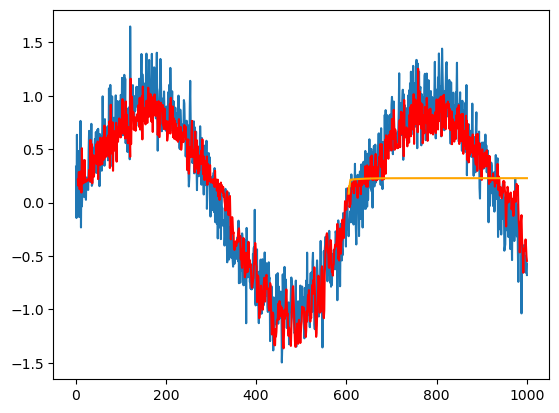

In [52]:
onestep_preds = net(features)
multistep_preds = torch.zeros(T)
multistep_preds[: n_train + tau] = x[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(
        multistep_preds[i - tau:i].reshape((1, -1)))
plt.plot(time, x.detach().numpy())
plt.plot(time[tau:], onestep_preds.detach().numpy(), color='red')
plt.plot(time[n_train + tau:], multistep_preds.detach().numpy()[n_train + tau:], color='orange')